In [9]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns

csv_file = "ADP_All_Measures.csv"
#load csv file
df = pd.read_csv(csv_file)
#print data size
print(df.shape)
#preprocess data
#check missed column
print(df.isna().sum())
#remove duplicated records
df.drop_duplicates
#print data size again
print(df.shape)
df.head()

(215280, 6)
Month        0
Area type    0
Area         0
Property     0
Measure      0
Value        0
dtype: int64
(215280, 6)


,Month,Area type,Area,Property,Measure,Value
0,2020-06-01,RTO,Northland RTO,Hotels,Number of establishments,16
1,2020-06-01,RTO,Northland RTO,Hotels,Number of active establishments,14
2,2020-06-01,RTO,Northland RTO,Hotels,Number of stay units,837
3,2020-06-01,RTO,Northland RTO,Hotels,Monthly stay unit capacity,25100
4,2020-06-01,RTO,Northland RTO,Hotels,Average stay units per establishment,52.3


In [10]:
#after preprocess, start to analyse data
df.groupby('Measure').agg('count')
#There are 18 measure can be chosen, there are 11960 records for every measure. 18*11960=215280


,Month,Area type,Area,Property,Value
Measure,,,,,
Available monthly stay unit capacity,11960,11960,11960,11960,11960
Average guests per stay unit night,11960,11960,11960,11960,11960
Average nights stayed per guest,11960,11960,11960,11960,11960
Average stay units per establishment,11960,11960,11960,11960,11960
Capacity utilisation rate,11960,11960,11960,11960,11960
Domestic guest nights,11960,11960,11960,11960,11960
Guest arrivals,11960,11960,11960,11960,11960
International guest nights,11960,11960,11960,11960,11960
Monthly stay unit capacity,11960,11960,11960,11960,11960


In [11]:
# according to requirement to choose a measure to analyse
#I can use SQL to create datasets and BI tools dynamic combination 
# Hypothesis:
# hotel  might use the occupancy rate to track how well its hotels are performing and to identify areas where it can improve.
# government agency might use the proportion of international guests to track the growth of the tourism industry.
# booking platform might use the average nights stayed per guest to recommend the best hotel for its users.

# example one. I choose 'Occupancy rate' to analyse
# select Month,value,Property,Area,Area_type from machine_learning.ADP_All_Measures 
# where Measure = "Occupancy rate" and Property='Total' and Area_type='TA' and Area='Total New Zealand'
# and Month between '2020-06-01' and '2023-09-01'  order by Month asc;
# parameterised these condition for freedom combination
filtered_df = df[(df['Measure'] == "Occupancy rate")
                 &(df['Property'] == "Total")
                 &(df['Area type'] == "TA")
                 &(df['Area'] == "Total New Zealand")
                 &(df['Month'] >= "2020-06-01")
                 &(df['Month'] <= "2023-09-01")].sort_values('Month')
print(filtered_df.shape)
filtered_df.head()

(40, 6)


,Month,Area type,Area,Property,Measure,Value
4167,2020-06-01,TA,Total New Zealand,Total,Occupancy rate,0.293
9549,2020-07-01,TA,Total New Zealand,Total,Occupancy rate,0.399
14931,2020-08-01,TA,Total New Zealand,Total,Occupancy rate,0.291
20313,2020-09-01,TA,Total New Zealand,Total,Occupancy rate,0.369
25695,2020-10-01,TA,Total New Zealand,Total,Occupancy rate,0.428


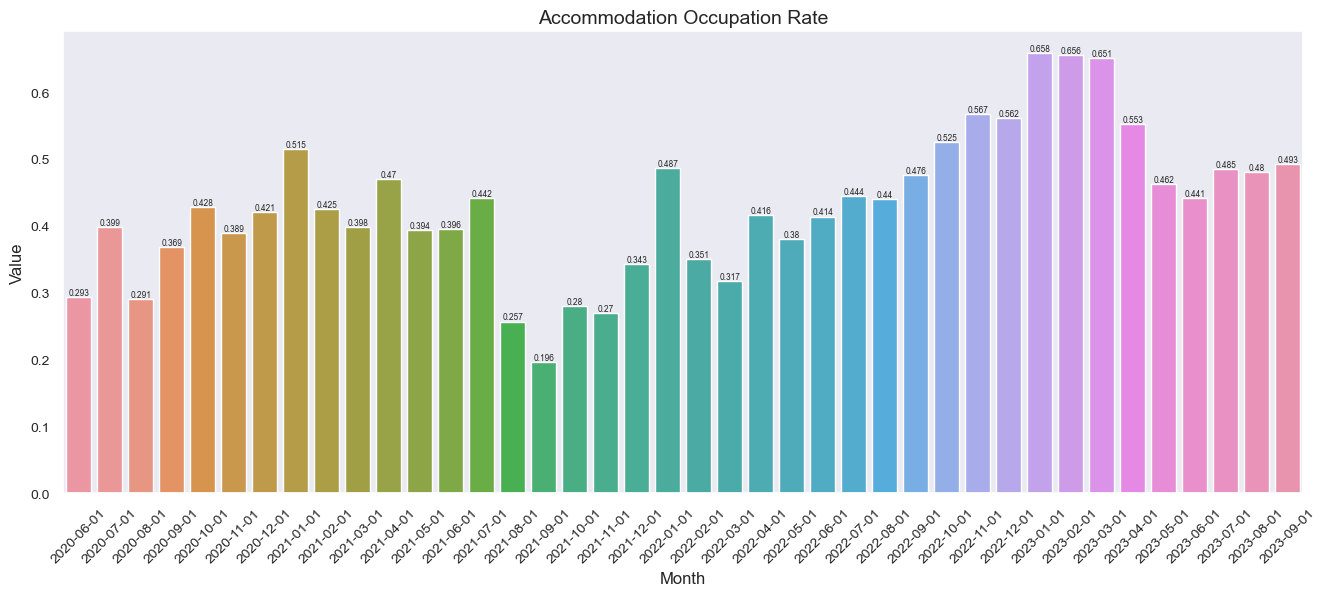

In [12]:
x=filtered_df["Month"]
y=filtered_df['Value'].astype(float)
#Start to draw diagram
#set a figure
plt.figure(figsize=(16,6))
sns.set(rc={"axes.grid":False,'xtick.labelsize':10,'ytick.labelsize':10})
plt.title("Accommodation Occupation Rate",fontsize = 14)
# Rotating X tickts by 45 degrees
plt.xticks(rotation=45) 
# Create a bar plot
ax = sns.barplot(x=x, y=y,errorbar=None)
ax.bar_label(ax.containers[0], fontsize=6)
plt.show()

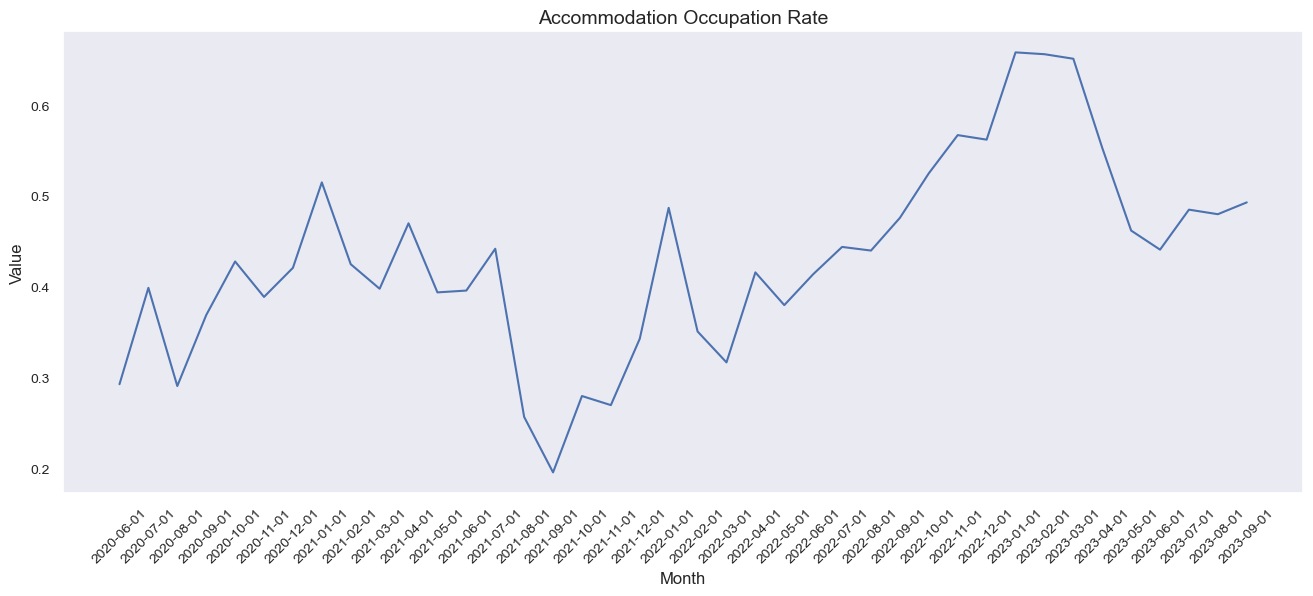

In [13]:
#set a figure
plt.figure(figsize=(16,6))
# Create a line plot
sns.lineplot(x=x, y=y,errorbar=None)
plt.title("Accommodation Occupation Rate",fontsize = 14)
# Rotating X tickts by 45 degrees
plt.xticks(rotation=45) 
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

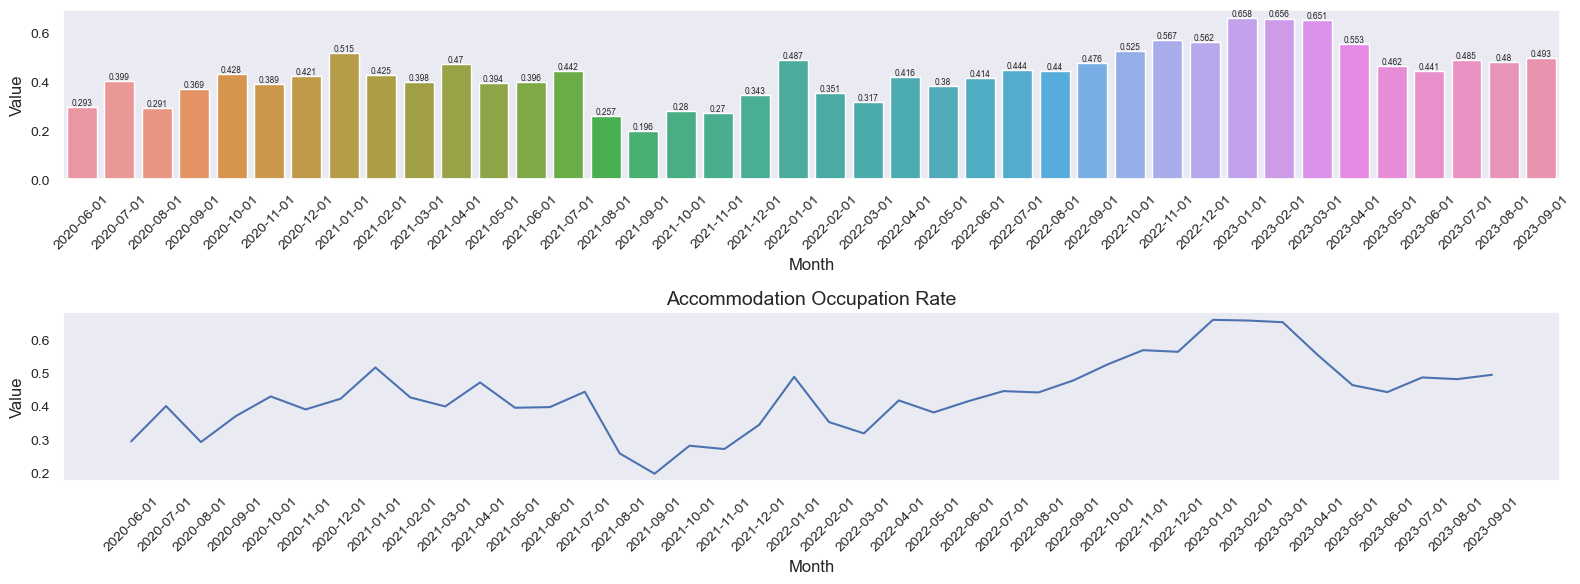

In [14]:
# Create subplots
fig, axes = plt.subplots(nrows=2, figsize=(16, 6))
sns.set(rc={"axes.grid":False,'xtick.labelsize':10,'ytick.labelsize':10})
# Create a bar plot
ax = sns.barplot(x=x, y=y,errorbar=None,ax=axes[0])
ax.bar_label(ax.containers[0], fontsize=6)
plt.sca(ax)
plt.xticks(rotation=45)
# Create a line plot
ax = sns.lineplot(x=x, y=y,errorbar=None,ax=axes[1])
plt.sca(ax)
plt.xticks(rotation=45)
plt.title("Accommodation Occupation Rate",fontsize = 14)
# Adjust layout
plt.tight_layout()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

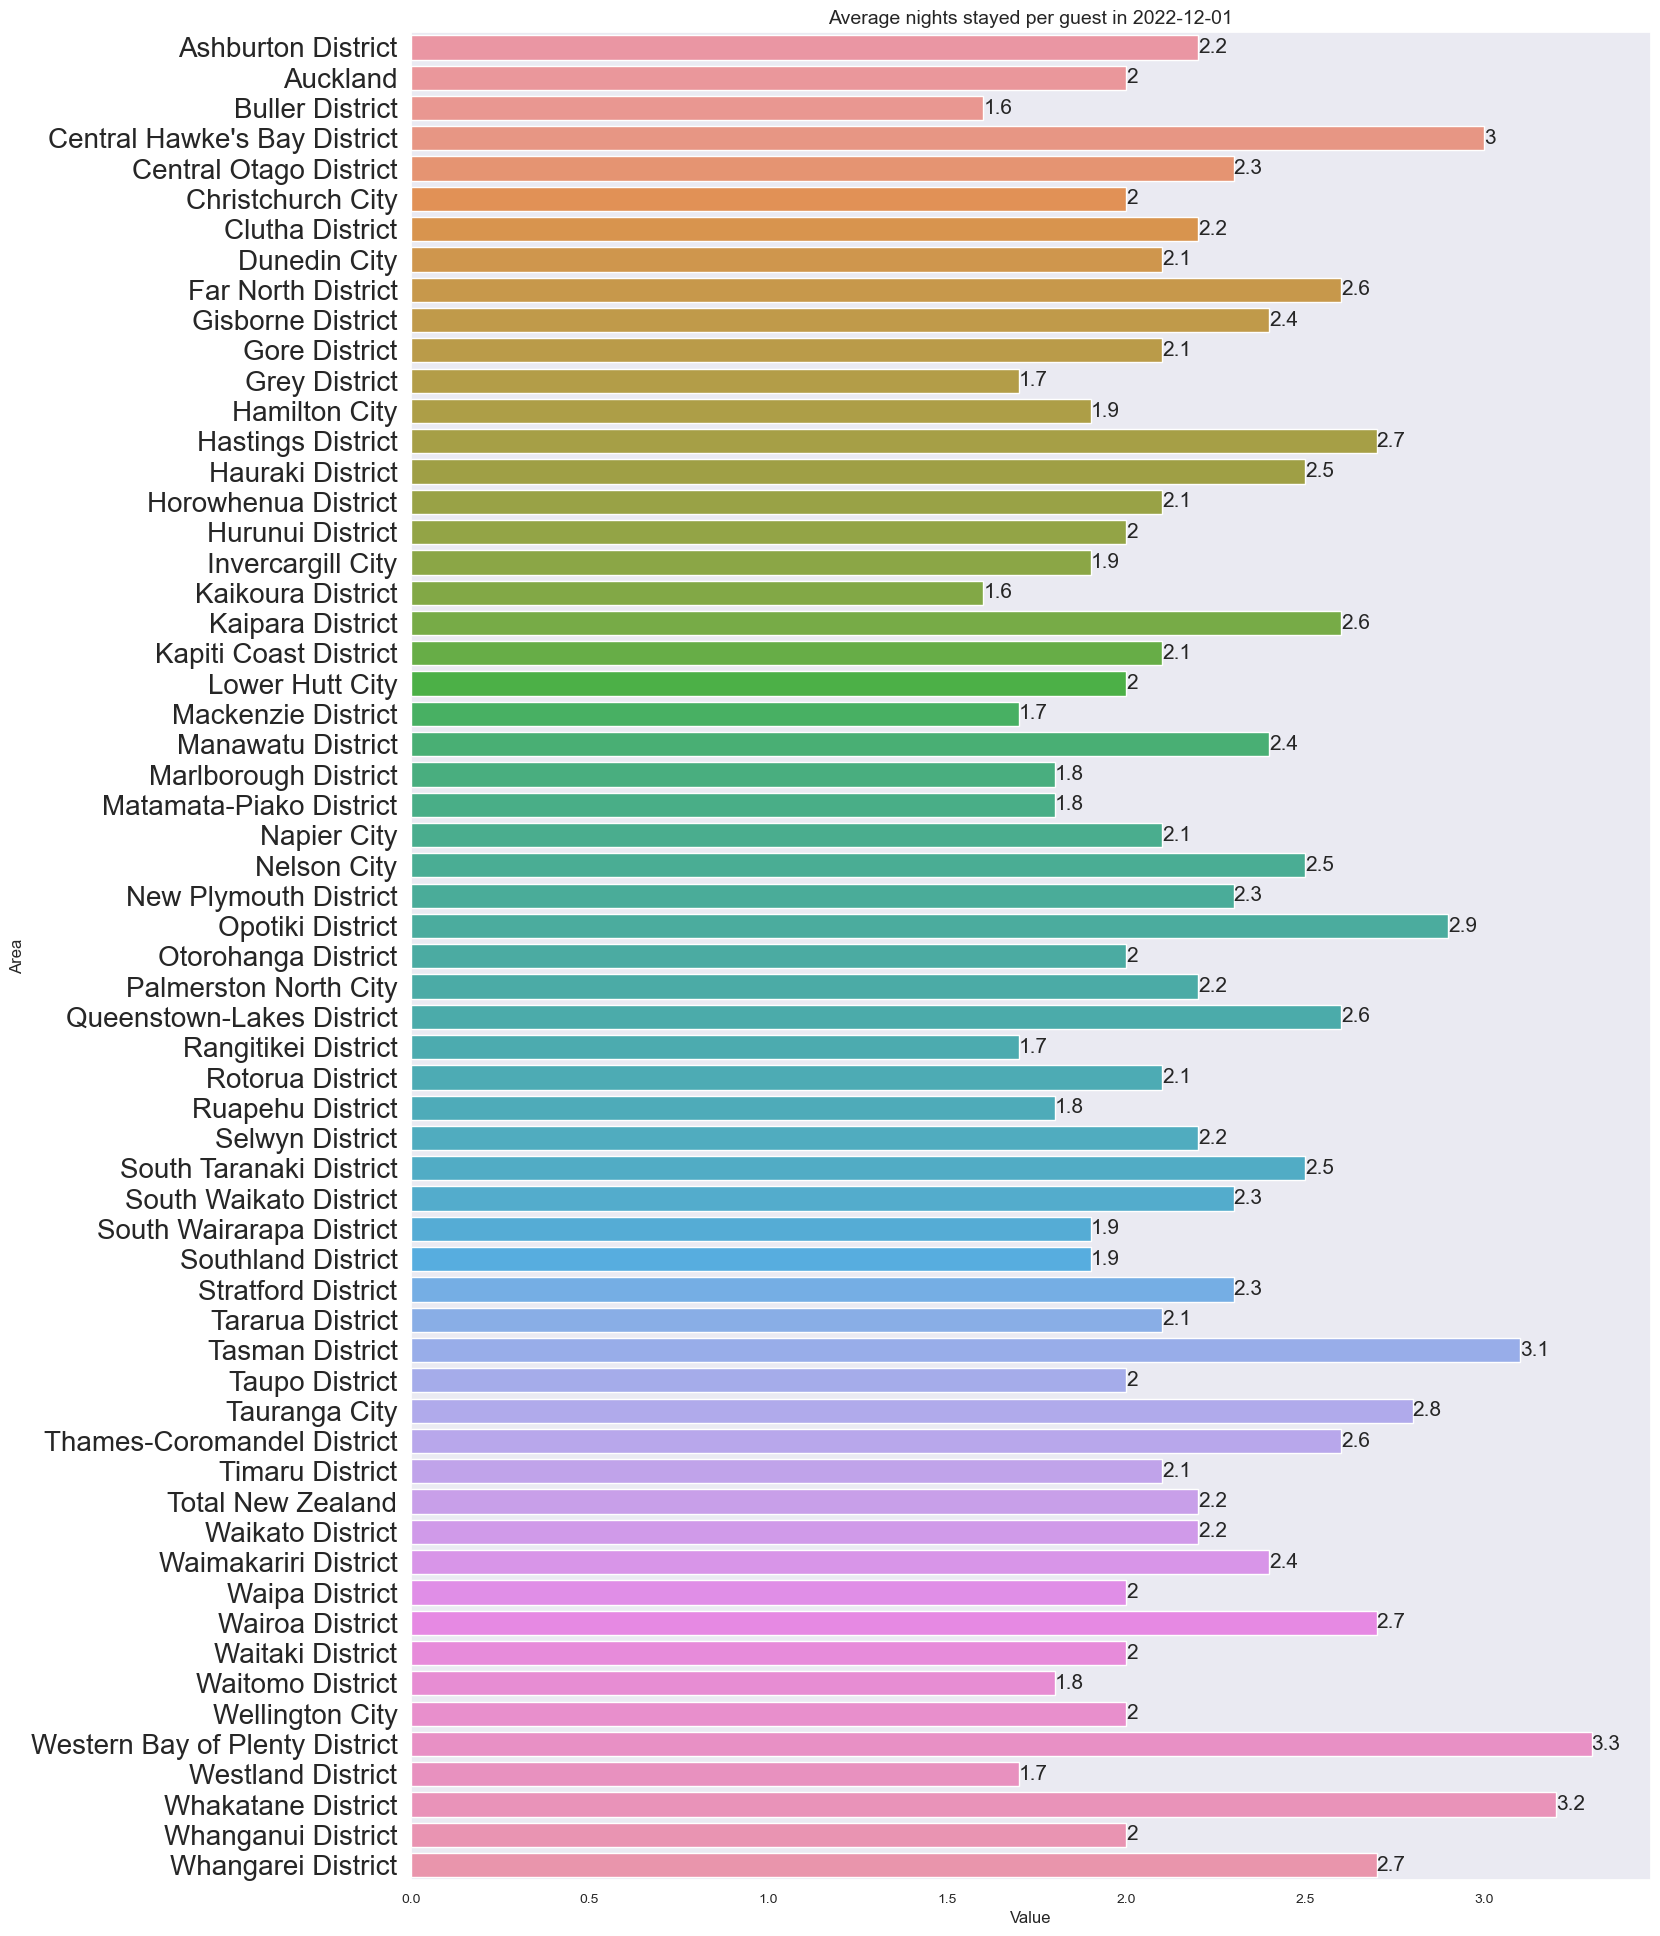

In [16]:
# example2 Average nights stayed per guest in Dec 2022( the highest number)
# select Month,value,Property,Area,Area_type from machine_learning.ADP_All_Measures 
# where Measure = "Average nights stayed per guest" 
# and Property='Total' and Area_type='TA'   and Month='2022-12-01' and value!= 'Confidentialised' order by Area asc;
date_str = '2022-12-01'
#remove Confidentialised value
filtered_df = df[(df['Measure'] == "Average nights stayed per guest")
                 &(df['Property'] == "Total")
                 &(df['Area type'] == "TA")
                 &(df['Month'] == date_str)
                 &(df['Value'] != "Confidentialised")].sort_values('Area')
x=filtered_df['Value'].astype(float)
y=filtered_df['Area']
#make figure looks larger
plt.figure(figsize=(16,24))
plt.title("Average nights stayed per guest in "+ date_str,fontsize = 14)
sns.set(rc={"axes.grid":False,'xtick.labelsize':10,'ytick.labelsize':20})
# create a bar chart
ax = sns.barplot(filtered_df,x=x,y=y)
ax.bar_label(ax.containers[0], fontsize=15)
plt.show